In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# load music files
debussy_file = "audio/debussy.wav"
redhot_file = "audio/redhot.wav"

debussy,sr = librosa.load(debussy_file)
redhot,_ = librosa.load(redhot_file)


In [5]:
# extract stft for spectogram

FRAMESIZE = 2048
HOPSIZE = 512

debusst_spec = librosa.stft(debussy,hop_length=HOPSIZE)
redhot_spec = librosa.stft(redhot,hop_length=HOPSIZE)

#### Band Energy Ratio

In [6]:
def calculate_split_freq_bin(spectrogram,split_frequency,sample_rate):
    frequency_range = sample_rate/2
    frequency_delta_per_bin = frequency_range / spectrogram.shape[0]
    split_frequency_bin = np.floor(split_frequency/frequency_delta_per_bin)
    return int(split_frequency_bin)


In [7]:
split_freq_bin = calculate_split_freq_bin(debusst_spec,2000,sr)
split_freq_bin

185

In [33]:
def calculate_ber(spectrogram,split_frequency,sr):
    split_freq_bin = calculate_split_freq_bin(spectrogram,split_frequency,sr)
    
    # calculate magnitude spec of spectrogram
    mag_spec = np.abs(spectrogram)**2
    # transpose mag_spec to iterate in frames(time)
    mag_spec = mag_spec.T
    # BER is a frame based feature. so we catch ber for every single frame
    
    band_energy_ratio = []
    
    for frequencies_in_frame in mag_spec:
        sum_of_low_frequencies = np.sum(frequencies_in_frame[:split_freq_bin])
        sum_of_high_frequencies = np.sum(frequencies_in_frame[split_freq_bin:])
        current_frame_ber = sum_of_low_frequencies / sum_of_high_frequencies
        band_energy_ratio.append(current_frame_ber)
        
    return np.array(band_energy_ratio)

In [34]:
ber_debussy = calculate_ber(debusst_spec,2000,sr)
ber_redhot = calculate_ber(redhot_spec,2000,sr)

In [35]:

ber_redhot.shape


(1292,)

### Visualize BEr

In [36]:
frames = range(ber_debussy.size)
frames

range(0, 1292)

In [37]:
t = librosa.frames_to_time(frames,hop_length=HOPSIZE)
len(t)

1292

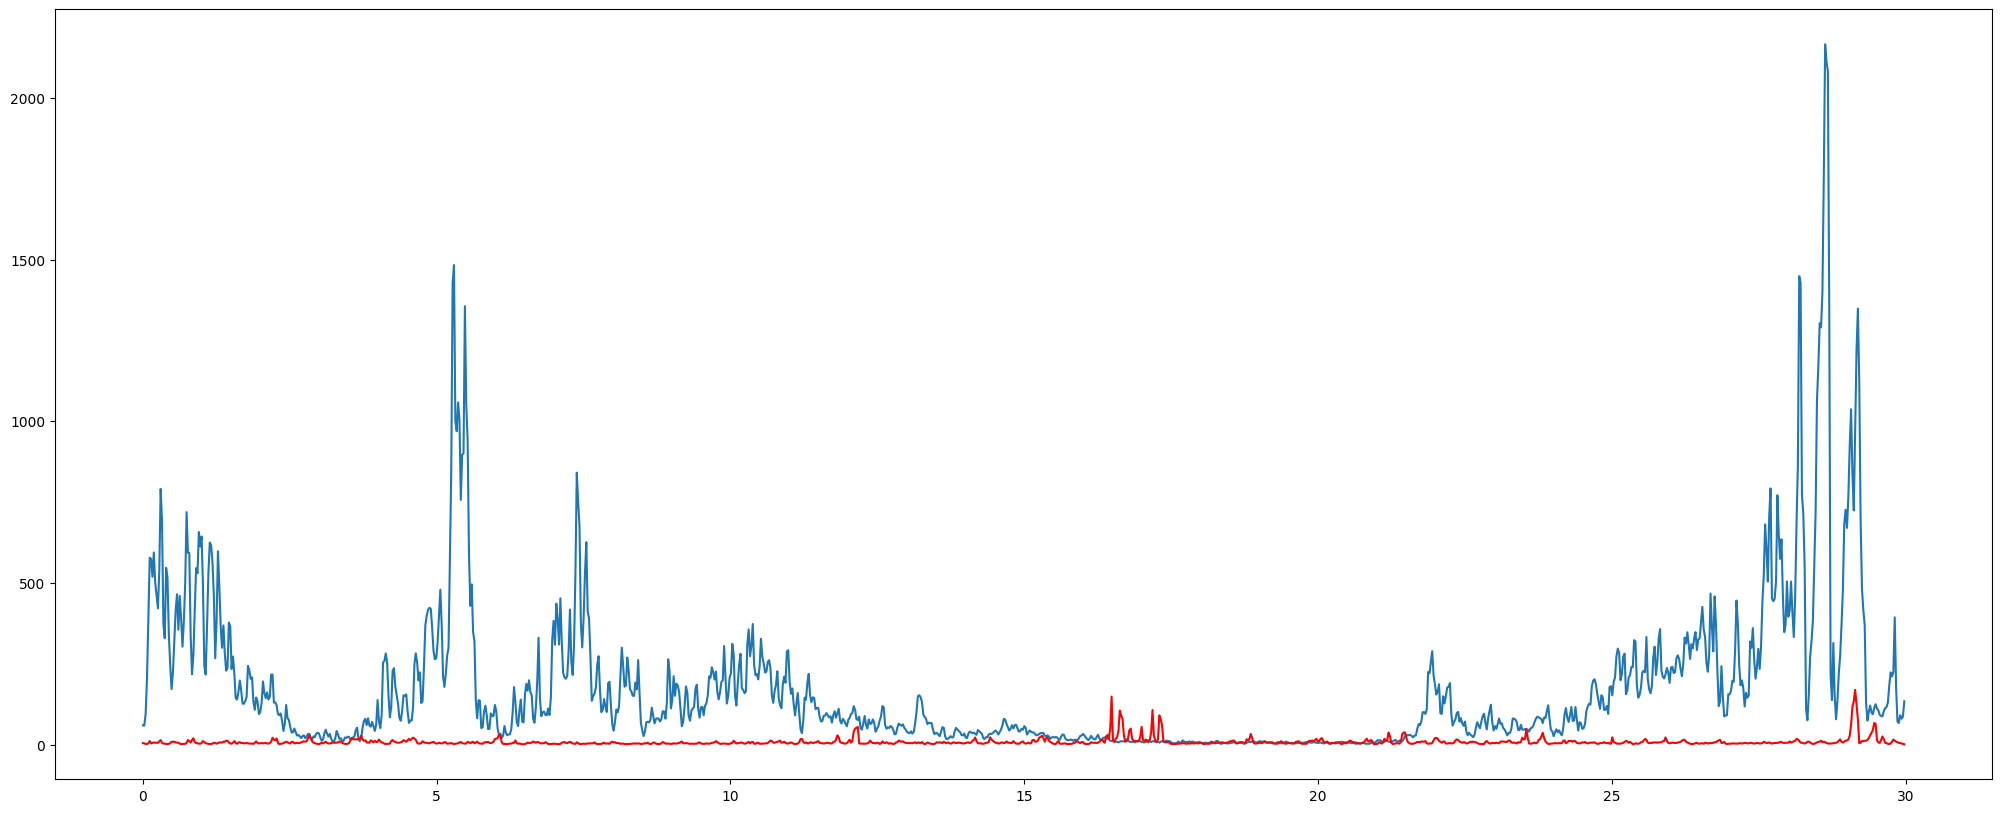

In [41]:
plt.figure(figsize=(25,10))
plt.plot(t,ber_debussy)
plt.plot(t,ber_redhot, color="r")

plt.show()
